In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('fasal_combined_all_crops_all_cities.csv')

# Drop irrelevant columns (customize as needed)
df = df.drop(columns=['unnecessary_column_1', 'unnecessary_column_2'], errors='ignore')

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    if col != 'risk_level':
        df[col] = LabelEncoder().fit_transform(df[col])

# Drop rows with missing target
df = df.dropna(subset=['risk_level'])


In [2]:
X = df.drop('risk_level', axis=1)
y = LabelEncoder().fit_transform(df['risk_level'])  # Encode target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [6]:
print("Features used for training:")
print(X.columns.tolist())


Features used for training:
['state', 'city', 'lat', 'lon', 'crop', 'season', 'sowing_date', 'harvest_date', 'area_ha', 'soil_type', 'soil_ph', 'soil_orgC', 'gdd', 'rainfall_mm', 'rainy_days', 'tmax_mean', 'tmin_mean', 'vpd_mean', 'ndvi_mean', 'ndvi_peak', 'ndvi_std', 'evi_mean', 'evi_peak', 'yield_t_ha', 'pmfby_insurer', 'pmfby_premium_rate_pct', 'pmfby_enrol_start', 'pmfby_enrol_end']


In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       489
           1       1.00      1.00      1.00      4202
           2       1.00      1.00      1.00      3037

    accuracy                           1.00      7728
   macro avg       1.00      1.00      1.00      7728
weighted avg       1.00      1.00      1.00      7728



Confusion Matrix:
 [[ 489    0    0]
 [   0 4202    0]
 [   0    0 3037]]


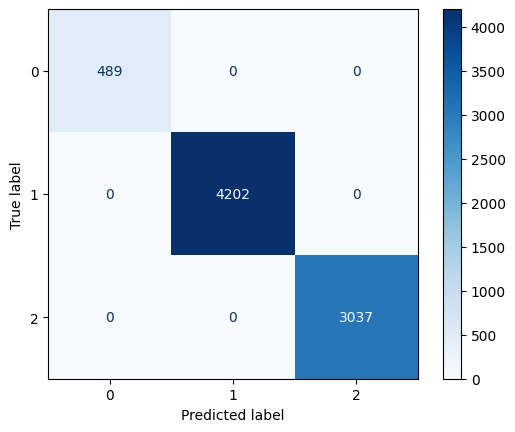

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
print("Confusion Matrix:\n", cm)
